In [209]:
import pandas as pd
import json
from collections import deque
import matplotlib.pyplot as plt

In [210]:
with open('/opt/ml/final/output/vflat_image_3.json') as f:
    json_data = json.load(f)

<h3>좌표에 w를 곱해서 겹치게 하기때문에 적절한 w값을 찾아야함

In [220]:
word_list = json_data['ocr']['word']
text_list = []
box_list = []
avg_x_list = []
avg_y_list = []
points_list = []

for word in word_list:
    point_list = []  
    w = 0.09 # 수정해야하는 값
    w1 = 1 + w
    w2 = 1 - w
    x_w = [w2,w1,w2,w1]
    y_w = [w2,w2,w1,w1]
    sum_x = 0
    sum_y = 0
    points_list.append(word['points'])
    
    for idx, point in enumerate(word['points']):
        sum_x += point[0]
        sum_y += point[1]
        point_list.append((point[0] * x_w[idx], point[1] * y_w[idx]))
        
    box_list.append(point_list)
    text_list.append(word['text'])
    avg_x_list.append(sum_x/4)
    avg_y_list.append(sum_y/4)

In [212]:
def isCross(origin,target):
    x_list = []
    y_list = []
    for x, y in origin:
        x_list.append(x)
        y_list.append(y)
    max_x = max(x_list)
    min_x = min(x_list)
    max_y = max(y_list)
    min_y = min(y_list)
    
    for x, y in target:
        if min_x<=x and x<=max_x and min_y<=y and y<=max_y:
            return True;

In [213]:
graph = [[] for _ in range(len(box_list))]

for i, origin in enumerate(box_list):
    for j, target in enumerate(box_list):
        if i >= j :
            continue
        if isCross(origin,target):
            graph[i].append(j)
            graph[j].append(i)
        

In [214]:
print(graph)

[[1], [0], [5, 9, 10, 11, 12, 14, 16, 18], [4, 5, 8, 13, 15, 16, 17], [3, 5, 8, 9, 13, 14, 15, 16, 18], [2, 3, 4, 9, 10, 11, 13, 14, 16, 18], [8, 15], [19, 20, 21], [3, 4, 6, 13, 15, 17], [2, 4, 5, 10, 11, 14, 16, 18], [2, 5, 9, 12, 14, 18], [2, 5, 9, 12, 14, 18, 23, 24, 25], [2, 10, 11, 18, 25], [3, 4, 5, 8, 14, 15, 16, 22, 23, 26, 29, 30, 31], [2, 4, 5, 9, 10, 11, 13, 16, 18, 23, 24, 25, 26, 29], [3, 4, 6, 8, 13, 16, 17, 22, 26, 28, 30, 31], [2, 3, 4, 5, 9, 13, 14, 15, 18, 23, 24, 25, 26, 29, 30], [3, 8, 15, 22, 26, 27, 28, 29], [2, 4, 5, 9, 10, 11, 12, 14, 16, 23, 24, 25], [7, 21], [7], [7, 19], [13, 15, 17, 26, 28, 31], [11, 13, 14, 16, 18, 24, 25, 30, 31, 32, 33, 35, 36], [11, 14, 16, 18, 23, 25, 30, 31, 32, 33, 35, 36], [11, 12, 14, 16, 18, 23, 24, 32, 33, 35, 36], [13, 14, 15, 16, 17, 22, 29, 30, 31], [17, 28, 29, 34], [15, 17, 22, 27, 29, 34], [13, 14, 16, 17, 26, 27, 28, 30, 31, 34], [13, 15, 16, 23, 24, 26, 29, 31, 35, 36], [13, 15, 22, 23, 24, 26, 29, 30, 35, 36], [23, 24, 2

In [215]:
sector_list = [-1 for _ in range(len(box_list))]
sector_idx = 0

for i in range(len(graph)):
    if sector_list[i] == -1:
        que = deque()
        que.append(i)
        sector_list[i] = sector_idx
        
        while que:
            now = que.pop()
            # print(now,que)
            # print(bool(que))
            for next in graph[now]:
                if sector_list[next] == -1:
                    sector_list[next] = sector_idx
                    que.append(next)
        
        sector_idx += 1

In [216]:
print(sector_list)

[0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [222]:
bc_df = pd.DataFrame({'text':text_list,'x':avg_x_list,'y':avg_y_list,'points':points_list,'cluster':sector_list})
bc_df

,text,x,y,points,cluster
0,자투자,2314.00,736.00,"[[1900, 626], [2728, 626], [2728, 846], [1900,...",0
1,CHATOCHA,2305.50,942.50,"[[2064, 911], [2547, 911], [2547, 974], [2064,...",0
2,평동,3257.00,1409.00,"[[3160, 1354], [3354, 1354], [3354, 1464], [31...",1
3,수원시,2099.00,1410.50,"[[1955, 1358], [2242, 1355], [2243, 1463], [19...",1
4,권선구,2433.00,1410.50,"[[2289, 1357], [2577, 1357], [2577, 1464], [22...",1
5,세화로,2761.50,1410.50,"[[2617, 1357], [2906, 1357], [2906, 1464], [26...",1
6,본사,1460.50,1413.25,"[[1360, 1358], [1563, 1361], [1561, 1469], [13...",1
7,금융부문이사,592.50,1415.50,"[[269, 1361], [916, 1361], [916, 1470], [269, ...",2
8,경기도,1770.50,1414.50,"[[1630, 1361], [1911, 1361], [1911, 1468], [16...",1
9,44,3005.00,1410.00,"[[2948, 1367], [3062, 1367], [3062, 1453], [29...",1


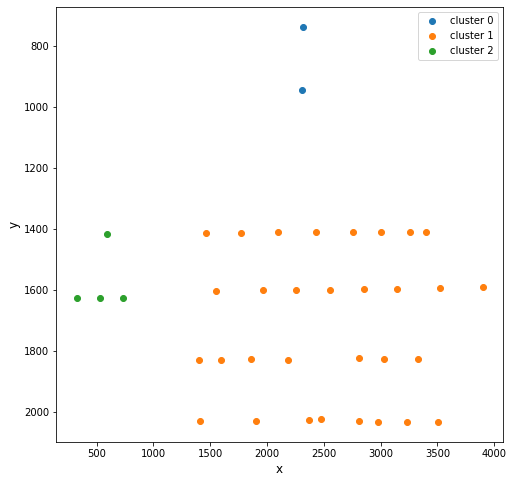

In [218]:
plt.figure(figsize = (8, 8))

for i in range(sector_idx):
    plt.scatter(bc_df.loc[bc_df['cluster'] == i, 'x'], bc_df.loc[bc_df['cluster'] == i, 'y'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.xlabel('x', size = 12)
plt.ylabel('y', size = 12)
plt.gca().invert_yaxis()
plt.show()